# Introduction

***

### Keras and Tensorflow
Keras is a deep learning API built on top of the Tensorflow machine learning platform. Tensorflow provides high level abstraction and gives the user the tools needed to develop machine learning solutions to solve complex problems. This project content will be based artificial neural networks called autoencoders and will explore Timeseries anomoly detection while leveraging the Keras documentation located on the [Keras website](https://keras.io/examples/timeseries/timeseries_anomaly_detection/). Lets take a look at what can be expected in this project:
- *Background Section* walking through Time Series Anomoly Detection, Neural Networks and Autoencoders.
- *Getting Started Section* where we have a look at the data used in documentation
- Neural Network Section..
- Evaluation Section..

# Background
### Time Series Anomoly Detection

Time series data can be thought of as a collection of data points gathered over time intervals. Evaluating this data allows us to trend how something changes over time and potentially helps us understand the underlying causes of the trends. 
<br>

An anomoly in a dataset can be thought of as an outlier where a datapoint differs significantly from the rest. For obvious reasons there is great benifit to identifying outliers in one's data to help identify potential risks. Bhattacharya (2020) helps describe the importance of detecting anomalies by detailing how companies constantly need to evaluate the "new normal" in the data to ultimately drive business decisions. He then details how one can appraoch this problem via Un-supervised nerual networks. Before exploring the keras variation of this (Autoencoders) lets take a step back and talk about Neural Networks.

###  Neural Networks  

Neural Networks are comprised of inter-connected layers of artificial neurons called nodes that perform operations on input to potentially yield an optimised output for a given problem **[Koech, 2022]**. As detailed by  Kostadinov (2019) a model typically trains itself through a process known as the "Chain Rule", where every feed forward through a network undergoes a back-propagation step where the weights and biases are adjusted based on the gradient of the cost function (we will explore cost functions in more detail later). Let's have a look at single neuron to help understand how they work (See Figure 1 below).

In the single neruron below we can see the inputs labelled as x<sub>1</sub> and x<sub>2</sub> have weights (w<sub>k1</sub>, w<sub>k2</sub>) and a Bias (b<sub>k</sub>) applied to them before being passed through an activation function (φ) to yield the output (y<sub>k</sub>). We can summarise the actions of the single neuron below with an equation that describe how the output is the activated weighted sum of the inputs.

*Equation for a Neuron with 2 inputs:* <br>
<span style="font-size:larger;">y<sub>k</sub> = φ( (w<sub>k1</sub> x<sub>1</sub>    + w<sub>k2</sub> x<sub>2</sub>) + b<sub>k</sub>) </span>

<img src="images/neural_network_image.png" width="800">
Figure 1. [Saxena, 2020]  

Lets explore the actions of a neuron in more detail before moving on to Autoencoders. The weights in a network determine dictate how important a given feature is in a model, for example a weights close to zero indicates that this input is not an important feature in the model. Weights help correlate relationships between features in the data dataset to target values. The idea here is that weights can moderate the association between features to prevent positive association on the summation process if the relationship is not positive, for example if we just sum the input data and the bias without multiplying them by the optimal weights we would result in a scenario where feature relationships are purely associative or dis-associative **[Ganesh (2020)]**. 

As per Ganesh (2020) lets explore a scenario where we have two input features and we want to perform binary classification. Figure 2 below shows two classes of data and the activation function using a neural network with weights (red) and without weights (black). The use of weights allows you to alter the slope of the line to better fit your model, whearas without weights the activation function of x<sub>2</sub> = -x<sub>1</sub>  + b has a constant slope of -1. Note that altering the bias just moves the activation function to the left or right and many different types of activation functions exist (we will explore this more later).

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set_style('darkgrid')

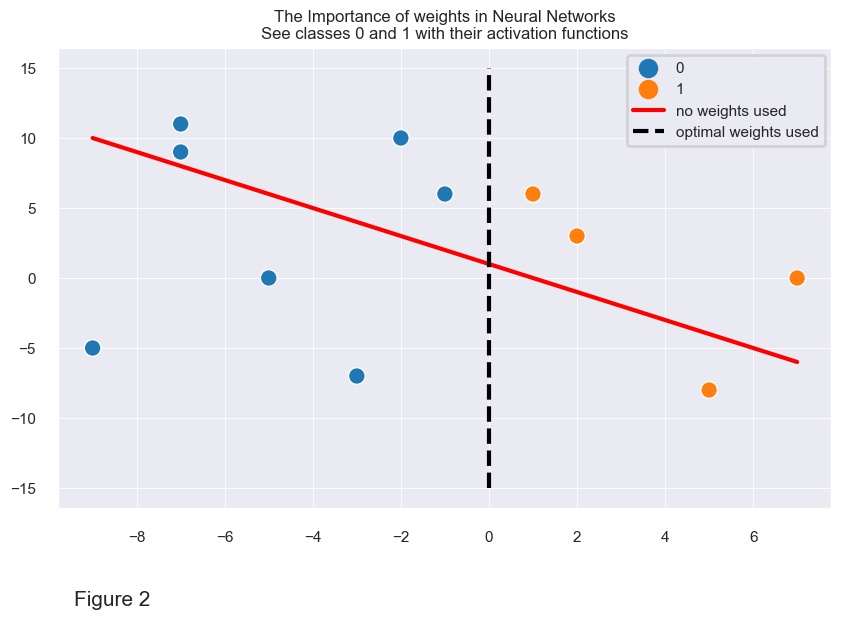

In [2]:
# two input arrays.
x1 = np.array([-9,  1, -5, -3,  5, -7, 2, -2, 7, -7, -1])
x2 = np.array([-5,  6,  0, -7, -8, 11, 3, 10, 0, 9, 6])

# class array (distinguish between features).
xclass = [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]

# set constant bias for plot
bias = 1

# dataframe for plotting.
df = pd.DataFrame({'x1':x1, 'x2':x2, 'class':xclass})

# create figure and single axes.
fig, ax = plt.subplots(figsize = (10, 6))

# plot input data
sns.scatterplot(data=df, x=x1, y=x2, hue='class')

# plot x1 and predicted y value using eqn: (x2 = -x1 + bias) -> no weights applied
sns.lineplot(data=df, x=x1, y =(-x1 + bias), color='red', label='no weights used')

# plot class boundary (activation function) a neural,
# network could achieve with optimal weights.
plt.plot([0, 0], [-15, 15], '--k', label = 'optimal weights used');

# format and label plot.
plt.figtext(0.18, -0.05, 'Figure 2', horizontalalignment='center', fontsize=15);
ax.title.set_text('The Importance of weights in Neural Networks\n\
See classes 0 and 1 with their activation functions')
plt.legend();

### Autoencoders  

An Autoencoder is a type of artifical neural network used to learn data encodings in an unsupervised manner, where the aim is to learn a lower-dimensational representation for higher dimenstional data **[Bandyopadhyay, 2022]**. This statement contains a lot of information, lets parse out the detail.

The ability of an Autoencoder to leverage the un-supervised learning approach allow us to draw insight from unlabelled data which is of great benifit as it can be very costly to label large datasets. The ANN's ability to transform data from higher to lower-dimensional space is very important as it can be very difficuly to interpret higher dimensional data. Think of a model trying to learn with a large number of input variables across 3 dimensions where the the important data needed to effectively train the model only occupies localised regions of the space. With such a scenario it could be computationally heavy to extract the relevant information from the space and could potentially lead to overfitting as more features are fed into the model, i.e: the model finds the best solution that may not be representative of the real world problem. Lets walk through figure 3 below to get a better understanding of how Autoencoders work.

As shown below they are comprised of an Input Layer, hidden layers (with a bottle neck) and an output layer. We can see that the encoding process occurs in the hidden layers before the bottelneck. The task of the encoder is compress the data to a lower dimension (as discussed presviously). This is achieved at the bottleneck as it forces information loss, this imperfect data is then passed through the decoder for de-compression and a reconstruction error is calculated (i.e difference between pre and post compression values). 

This reconstruction error can be leveraged when trying to detect anomalous data. Imagine an autoencoder model which was trained to the highest possible degree in the lower dimensional space. An outliar data point relative to the model would have a high reconstruction error and therefore be labelled as an anomoly. Ok lets get into the Keras documentation on their approach using an autoencoder for timeseries anomaly detection.

<img src="images/autoencoder.png" width="700">
Figure 3. [Bandyopadhyay, 2022]


<br>

# Getting Started

***

### Looking at the Dataset

As per the [Keras documentation](https://keras.io/examples/timeseries/timeseries_anomaly_detection/) we will use two datasets from the Numenta Anomaly Benchmark (NAB). NAB is a benchmark for testing algorithms for anomoly detection in streaming online applications. Details on the NAB Datasets and how different algorithms performed on the datasets can be accessed at the  [NAB documentation](https://github.com/numenta/NAB) on github. The scoreboards located here compare the algorithms performances based on standard profile vs. false positives and negative scores obtained. For this project we will be exploring two datasets:
1. Artifical with no anomoly ([art_daily_small_noise.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv))
2. Artifical with anomoly ([art_daily_jumpsup.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv))


In [3]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [4]:
# read no anomaly file and with timestanp column as index.
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

# look at last 5 rows of dataset.
df_small_noise.tail()

,value
timestamp,
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127
2014-04-14 23:50:00,21.798801
2014-04-14 23:55:00,18.682620


In [5]:
# check datatype present in dataframe
df_small_noise.dtypes

value    float64
dtype: object

In [6]:
# Check un-formatted value of last row in small noise dataset,
# Notice pandas is performing some rounding when converting to float64.
df_small_noise.iloc[-1].values[0]

18.6826203655

In [7]:
# Generate descriptive stats on dataset.
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


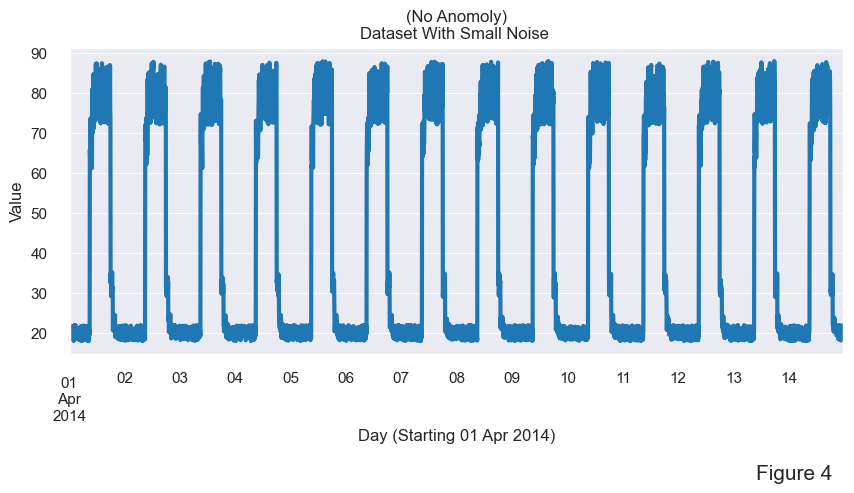

In [8]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax)

# format and label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(No Anomoly)\nDataset With Small Noise ")
plt.figtext(0.85, -0.2, 'Figure 4', horizontalalignment='center', fontsize=15);

In [9]:
# # read anomaly file and with timestanp column as index.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

# look at first 5 rows.
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [10]:
# Generate descriptive stats on dataset.
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


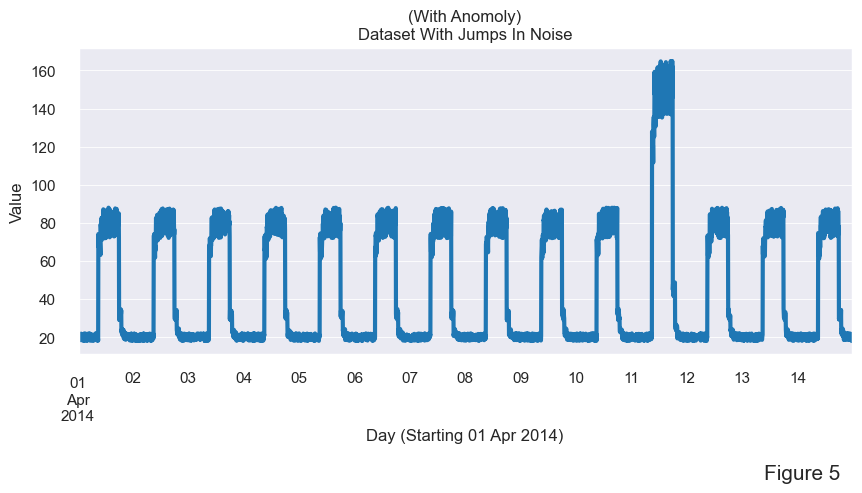

In [11]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax)

# label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(With Anomoly)\nDataset With Jumps In Noise")
plt.figtext(0.85, -0.2, 'Figure 5', horizontalalignment='center', fontsize=15);

### Dataset Observations
# more to do here *************************************

On comparison of the datasets we can see that Figure 4 shows intermittenet sinal ...
Add plots where signal jumps (with times)...

## Pre-processing

***

Before we build the Neural Network we will need to carry out a few Pre-processing tasks. Data Pre-processing is a very important step before the modelling of a dataset as it prepares the raw data for modelling. We will perform the following operations on our data:
- **Standardization** of the data to ensure it is scaled properly. This is an important pre-processing step for machine learning models as all features are alligned to a common scale which contributes to more efficient learning. The expected outcome of this process is that the data will have a mean of nearly zero and a standard deviation of 1. 
- **Transformation** of the data to create a fully windowed datset. Windowing a dataset involves partitioning it into sub-sections and increasing the number of dimensions (UM, 2020). The transformed dataset can then be leveraged via a convolutional neural network's in the Keras library (more on this later).

### Standardization

In [12]:
# calculate mean of dataset with small noise.
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [13]:
# calculate standard deviation of dataset with small noise.
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [14]:
# Standardization of data to transform it to standard format.
df_train_vals = (df_small_noise - train_mean) / train_std

# check first 5 rows.
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [15]:
# confirm mean is nearly 0.
df_train_vals['value'].mean()

-2.616541242931684e-15

In [16]:
# confirm std dev is nearly 1.
df_train_vals['value'].std()

1.0000000000000018

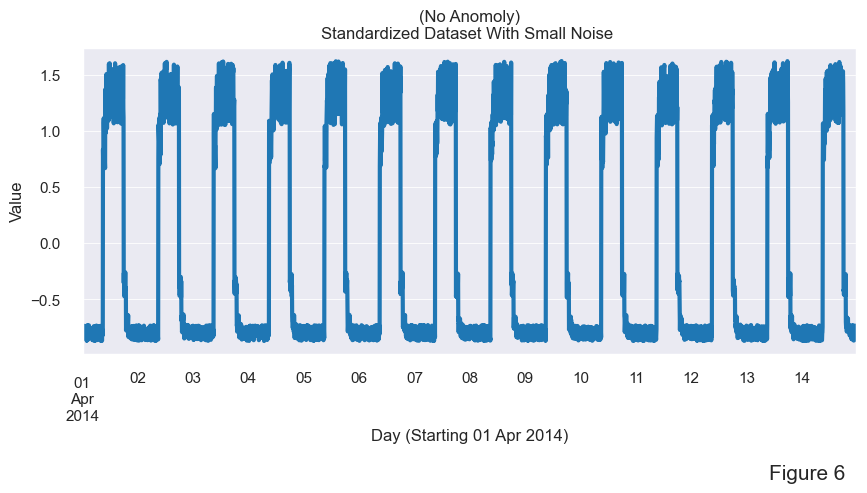

In [17]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax)

# format and label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(No Anomoly)\nStandardized Dataset With Small Noise ")
plt.figtext(0.85, -0.2, 'Figure 6', horizontalalignment='center', fontsize=15);

### Transformation

In [18]:
# Get shape of training values (its one dimensional).
df_train_vals.shape

(4032, 1)

Let's take a look at an example of an overalapping windowed dataset before we transform our models data:
```python
pre_window =  [1, 1, 2, 4, 5, 6, 7, 1, 2]
window_size =  3
post window = [1, 1, 2]     
              [1, 2, 4]
              [2, 4, 5]
              [4, 5, 6]
              [5, 6, 7]   
              [6, 7, 1] 
              [7, 1, 2]            
```

In [19]:
def windows(vals, window_size):
    '''
    Returns stacked windows (2D Numpy array) relative to passed window size N
    '''   
    # declare empty list.
    L = []
    # loop through all the possible windows.
    for i in range(len(vals) - window_size + 1):
        # append a windows to the list.
        L.append(vals[i:i + window_size])
        
    # Stack the windows to form 2D numpy array.
    return np.stack(L)

In [20]:
# declare window size.
window_size = 288

# get 2D numpy array of training values (with 288 windows).
x_train = windows(df_train_vals, window_size)

In [21]:
# First value of first window and last value of last window.
f'{x_train[0][0][0]:.5f}', \
f'{x_train[-1][-1][0]:.5f}'

('-0.85883', '-0.84609')

In [22]:
# First and last Values in Training Dataset
f'{df_train_vals.iloc[0][0]:.5f}', \
f'{df_train_vals.iloc[-1][0]:.5f}'

('-0.85883', '-0.84609')

In [23]:
# check dimensions are correct (notice 288 windows).
x_train.shape

(3745, 288, 1)

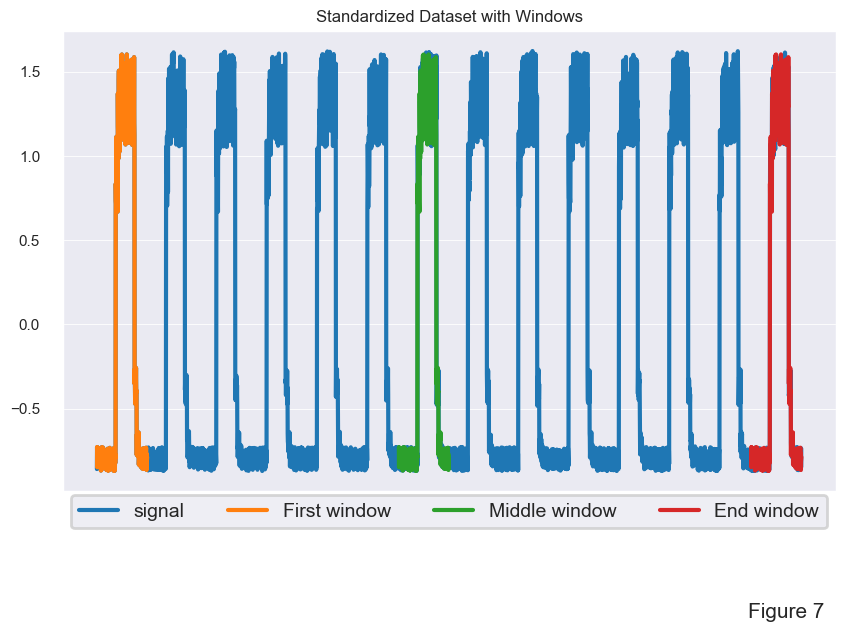

In [24]:
# Declare custom window.
window_no = 1

# Create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

# set y var to df train values 
y = df_train_vals['value'].values# [:1200]

# plot dataset signal 
# (leverage np.arange function to generate custom x-axis)
ax.plot(np.arange(y.shape[0]), y, label='signal')

# Declare the first window
w = x_train[window_no].flatten()  # flatten collapses array into 1 dimension

# Plot the first window.
ax.plot(np.arange(w.shape[0]) + 1, w, label='First window')

# Plot the Middle window.
ax.plot(np.arange(w.shape[0]) + 1728, w, label='Middle window')

# Plot the End window.
ax.plot(np.arange(w.shape[0]) + 3745, w, label='End window')

# Hide yaxis as the labels no longer reflect time
ax.axes.get_xaxis().set_ticks([]) 

# format and label plot.
ax.set_title("Standardized Dataset with Windows")
plt.figtext(0.85, -0.1, 'Figure 7', horizontalalignment='center', fontsize=15)
ax.legend(bbox_to_anchor=(0, -0.1 ,1 ,0.2),mode="expand", ncol=4, fontsize = 14);

<h2>References:</h2>

<br> 

[1]. Bhattacharya, A, 2020, Effective Approaches for Time Series Anomaly Detection, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/effective-approaches-for-time-series-anomaly-detection-9485b40077f1) (Viewed 21 December 2022).

<br>

[2]. Bandyopadhyay, H, 2022, Autoencoders in Deep Learning: Tutorial & Use Cases, V7labs, available at:<br>
[Ref Link](https://www.v7labs.com/blog/autoencoders-guide) (Viewed 21 December 2022).

<br>

[3].Koech, K, 2022, The Basics of Neural Networks (Neural Network Series) — Part 1, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/the-basics-of-neural-networks-neural-network-series-part-1-4419e343b2b) (Viewed 22 December 2022).

<br>


[4] Saxena, A, 2020, Building a Simple Neural Network from Scratch, Towards Data Science, available at:<br>[Ref Link](https://miro.medium.com/max/640/1*UWJ52M5qNZp-38j11STT5g.webp) (Viewed 22 December 2022).

<br>

[5]. Ganesh, S, 2020, What’s The Role Of Weights And Bias In a Neural Network?, Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/whats-the-role-of-weights-and-bias-in-a-neural-network-4cf7e9888a0f) (Viewed X December 2023). ******* Figure 2*******

<br>

[6].JORDAN, J, 2018, Introduction to autoencoders. Data Science, available at:<br>
[Ref Link](https://www.jeremyjordan.me/autoencoders/) (Viewed 23 December 2022).


<br>   

[7]. S, Kostadinov, 2019, Understanding Backpropagation Algorithm, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd) (Viewed 23 December 2022).

<br>

[8]. Um, A, 2020, Preprocessing time series to windowed datasets, medium.com, available at:<br>
[Ref Link](https://albertum.medium.com/preprocessing-time-series-to-windowed-datasets-a464799b1df7) (Viewed 28 December 2022).

<br>


[9]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>


[10]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>

## Neural Network

***

In [25]:
x_train.shape

(3745, 288, 1)

In [26]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [27]:
#
model = keras.Sequential(layers)

In [28]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [29]:
# 
model.compile(optimizer=optimizer, loss="mse")

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [31]:
# https://keras.io/api/models/model_training_apis/

history = model.fit(
    x_train,   # input data
    x_train,   # output data (same as input data as same data expected in output)
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 72ms/step - loss: 0.4802 - val_loss: 0.0728
Epoch 2/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0779 - val_loss: 0.0408
Epoch 3/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0588 - val_loss: 0.0370
Epoch 4/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0509 - val_loss: 0.0326
Epoch 5/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0451 - val_loss: 0.0292
Epoch 6/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0400 - val_loss: 0.0261
Epoch 7/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0358 - val_loss: 0.0252
Epoch 8/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0325 - val_loss: 0.0248
Epoch 9/50
27/27 [==============================] - 2s 61ms/step - loss: 0.0299 - val_loss: 0.0237
Epoch 10/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0274 - val_loss: 0.0231
Epoch 11/

## Evaluation

***

In [32]:
history.history["loss"]

[0.4802398979663849,
 0.07794225960969925,
 0.058842506259679794,
 0.050857797265052795,
 0.04509638622403145,
 0.03995012119412422,
 0.03580760210752487,
 0.032530732452869415,
 0.029871633276343346,
 0.02741689421236515,
 0.0257918331772089,
 0.024337735027074814,
 0.023160003125667572,
 0.022124620154500008,
 0.021104978397488594,
 0.02037997543811798,
 0.01961660198867321,
 0.018874570727348328,
 0.018246211111545563,
 0.017585033550858498,
 0.017050351947546005,
 0.016451697796583176,
 0.01593085192143917,
 0.015447298064827919,
 0.01510675624012947,
 0.014676712453365326,
 0.01427377201616764,
 0.013989241793751717,
 0.013653316535055637,
 0.013300726190209389]

In [33]:
history.history["val_loss"]

[0.0728229209780693,
 0.04083435237407684,
 0.03696189820766449,
 0.032636165618896484,
 0.029165590181946754,
 0.02605963870882988,
 0.025244854390621185,
 0.024822702631354332,
 0.023742543533444405,
 0.023128869011998177,
 0.02434348501265049,
 0.02420152723789215,
 0.02370835840702057,
 0.023435166105628014,
 0.023071274161338806,
 0.022682180628180504,
 0.02218596078455448,
 0.02229090966284275,
 0.023129001259803772,
 0.020843984559178352,
 0.02217373624444008,
 0.021128792315721512,
 0.021275438368320465,
 0.021649159491062164,
 0.02041204646229744,
 0.022338971495628357,
 0.021629588678479195,
 0.024077357724308968,
 0.021692682057619095,
 0.02071288786828518]

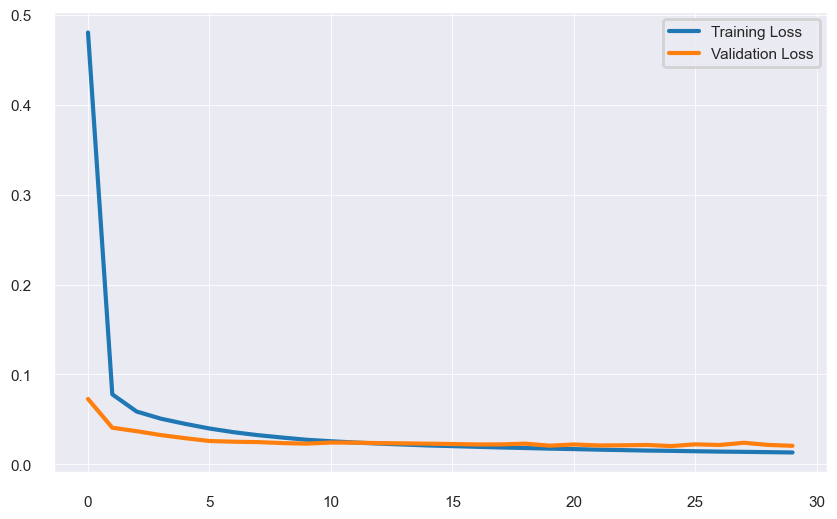

In [34]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [35]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 6ms/step


In [36]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

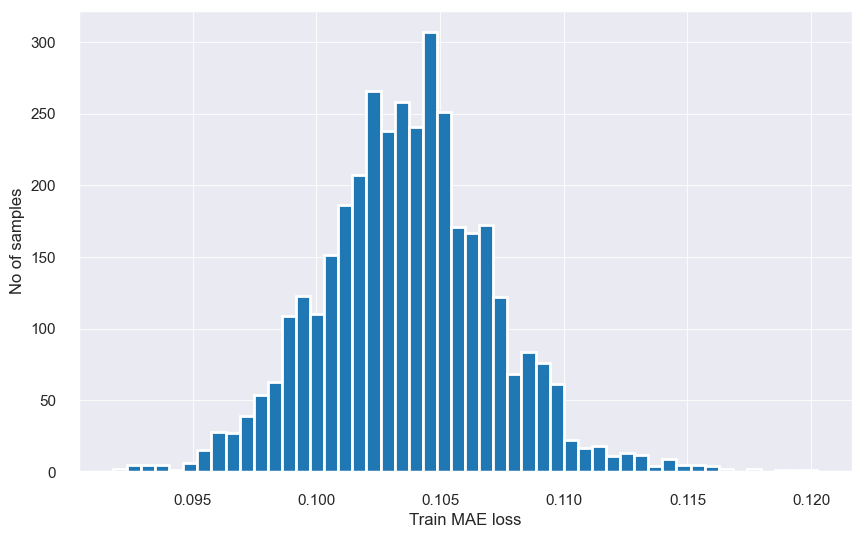

In [37]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [38]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.12024945491755536

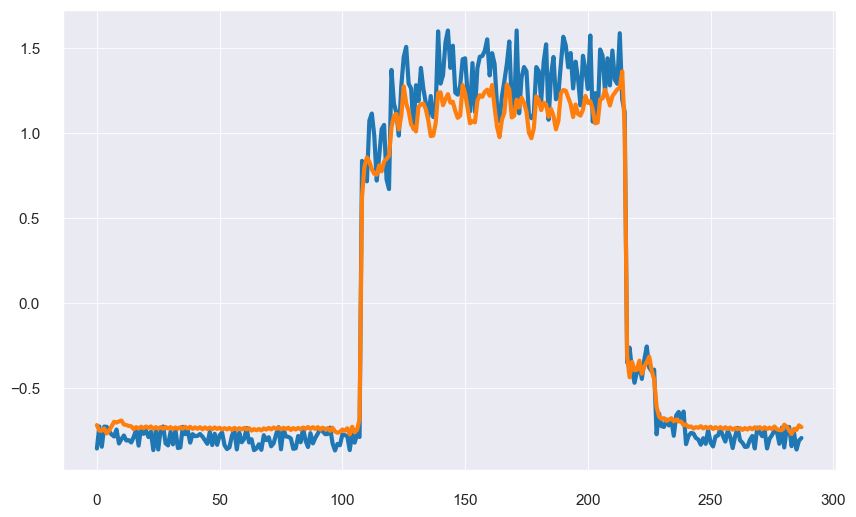

In [39]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [40]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

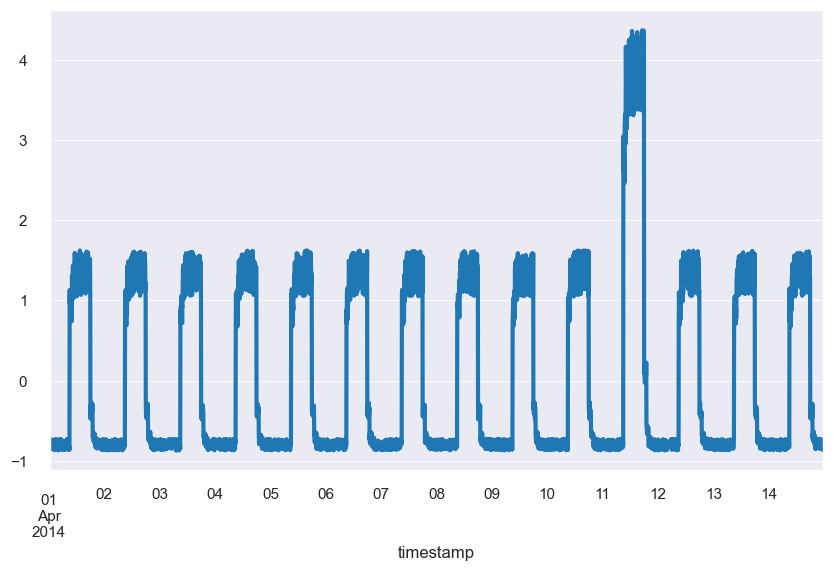

In [41]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [42]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

TypeError: windows() missing 1 required positional argument: 'window_size'

In [ ]:
# 
x_test_pred = model.predict(x_test)

In [ ]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

In [ ]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [ ]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [ ]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

In [ ]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

***

## End